### Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('2018_worldcup_v3.csv')
df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Referee,Assistant 1,Assistant 2,MatchID,Attendance
0,2018,14 Jun 2018 - 18:00,Group A,"Luzhniki Stadium,",Moscow,Russia,5,0,Saudi Arabia,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),300331503,78011
1,2018,15 Jun 2018 - 17:00,Group A,"Ekaterinburg Arena,",Ekaterinburg,Egypt,0,1,Uruguay,KUIPERS Bjorn (NED),VAN ROEKEL Sander (NED),ZEINSTRA Erwin (NED),300353632,27015
2,2018,15 Jun 2018 - 18:00,Group B,"Saint Petersburg Stadium,",St. Petersburg,Morocco,0,1,IR Iran,CAKIR Cuneyt (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),300331526,62548
3,2018,15 Jun 2018 - 21:00,Group B,"Fisht Stadium,",Sochi,Portugal,3,3,Spain,ROCCHI Gianluca (ITA),DI LIBERATORE Elenito (ITA),TONOLINI Mauro (ITA),300331524,43866
4,2018,16 Jun 2018 - 13:00,Group C,"Kazan Arena,",Kazan,France,2,1,Australia,CUNHA Andres (URU),TARAN Nicolas (URU),ESPINOSA Mauricio (URU),300331533,41279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2018,07 Jul 2018 - 21:00,Quarter-finals,"Fisht Stadium,",Sochi,Russia,2,2,Croatia,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),300331504,44287
60,2018,10 Jul 2018 - 21:00,Semi-finals,"Saint Petersburg Stadium,",St. Petersburg,France,1,0,Belgium,CUNHA Andres (URU),TARAN Nicolas (URU),ESPINOSA Mauricio (URU),300331531,64286
61,2018,11 Jul 2018 - 21:00,Semi-finals,"Luzhniki Stadium,",Moscow,Croatia,2,1,England,CAKIR Cuneyt (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),300331522,78011
62,2018,14 Jul 2018 - 17:00,Play-off for third place,"Saint Petersburg Stadium,",St. Petersburg,Belgium,2,0,England,FAGHANI Alireza (IRN),SOKHANDAN Reza (IRN),MANSOURI Mohammadreza (IRN),300331536,64406


In [20]:
[x for x in df.columns if 'Goals' in x]

['Home Team Goals', 'Away Team Goals']

In [57]:
df1 = df[[x for x in df.columns if 'Goals' in x] + ['Home Team Name']]\
    .groupby('Home Team Name').sum().reset_index()
df1


,Home Team Name,Home Team Goals,Away Team Goals
0,Argentina,1,4
1,Australia,0,2
2,Belgium,13,4
3,Brazil,6,3
4,Colombia,2,3
5,Costa Rica,0,1
6,Croatia,5,2
7,Denmark,1,1
8,Egypt,0,1
9,England,6,2


In [64]:
def vin(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        print(' V')
    elif row < row:
        print(' L')
    else:
        print('N') 
    

In [65]:
df1 = df1['Result'] = df1.apply(vin)

KeyError: 'Home Team Goals'

In [23]:
df2 = df[[x for x in df.columns if 'Goals' in x] + ['Away Team Name']]\
    .groupby('Away Team Name').sum()
df2

,Home Team Goals,Away Team Goals
Away Team Name,,
Argentina,5,5
Australia,3,2
Belgium,2,3
Brazil,0,2
Colombia,0,4
Costa Rica,4,2
Croatia,7,9
Denmark,1,2
Egypt,5,2


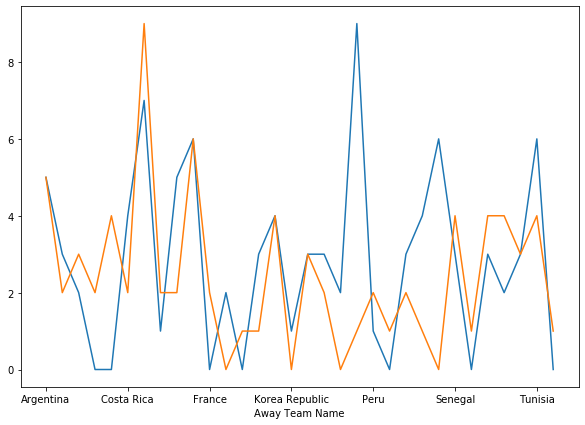

In [31]:
df1['Home Team Goals'].plot()
df2['Away Team Goals'].plot()